# Text Analytics | BAIS:6100
# Test 2

Your name: Jerry Jacob

In [1]:
# Do not make any change to this cell. Just run this cell.
import pandas as pd
pd.set_option('display.max_colwidth', 150)

df = pd.read_csv("classdata/tweets/tweets_test2.csv", sep="\t")
df

,user_screen_name,user_gender,user_description,tweet
0,JuliaAhlfeldt,female,"Customer Experience specialist and podcaster, dedicated to developing actionable #strategy and enhancing business performance through #CX and #CEM.",Great to see global climate activism happening locally!
1,heswithljp,female,"fan account for 1d, whomst is, indeed, not died yet",why the fuck area 51 got more social media hype than climate strike
2,kayleighfalvey,female,Final year student at #uccdh with a passion for Gender Equality and Pop Culture. | Staff in the @UCCVisitorsCent.,RDJ being the real life Tony Stark to combat climate change is something I can get behind!!
3,sy4hme,male,Ex-Astech//UTeM🔫 🏆/COYG🔴,Nooooooooooooooo stop climate change
4,karenannlu,female,"Sharing news and information about architecture, leadership, Chinese language immersion, and random interesting things.",Finally this happened. Maybe we can all turn our sights to long-term goals. Hint: Climate change.
...,...,...,...,...
4995,jjhatelak,male,An aspiring sports blogger w/WindyCityChronicle.com Focusing on the Chicago Bears/NFL/NFL Draft. Love Metal! \m/ #HouseHalas #GOTs7 #TWD,"Yeah, there are no climate issues we need to worry about."
4996,doctoroktracie,female,"Clinical hypnotherapist, psychotherapist, crisis & trauma specialist, coach & naturopath. Resilience trainer, inspirational & motivational speaker.",I you're voting for money you're burning down your children's future - climate change
4997,chelleinvegas75,female,Aussie gal living in Vegas with my daughter and my pups 🐶 #VegasStrong #OaklandRaiders #GoldenKnights,Omg I am so shocked that the climate is hot and there are tourists... in vegas... who would have ever thought 🤔😏
4998,QueenieV007,female,"Actress, Avenger, ❤ Musicals &Ballet. #teamstark #teamironman #Marvel consulting detective #Holmes Proud Kiwi. Go the Mighty All Blacks! Queen V!","mum told me she didn't believe in climate change, okay so NZ is in the middle of winter and yet we are having nor'wester's"


### 1. (5 pts)

In [2]:
# Do not make any change to this cell. Just run this cell.
from sklearn.metrics import classification_report, confusion_matrix

def train_test(X_train, X_test, y_train, y_test, classifier):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    
    print("Train score: {:.2f}".format(classifier.score(X_train, y_train)))
    print("Test score: {:.2f}\n".format(classifier.score(X_test, y_test)))
    print("Classification report:\n{}".format(classification_report(y_test, pred, zero_division=0)))
    print(confusion_matrix(y_test,pred))
    
    return classifier

In [3]:
# Do not make any change to this cell. Just run this cell.
from nltk.corpus import stopwords
import string

global_stopwords = stopwords.words("english")
local_stopwords = [c for c in string.punctuation] +\
                  ['’', '...', '``', "''", '“', '”', "'m", "'re", "'s", "amp", "n't", 'climate', 'get', 'would']

In [4]:
# Do not make any change to this cell. Just run this cell.
desc1 = "Aunt🌹Christian ✝️ @BiolaU @LibertyU #BacktheBlue👮‍♂️ #Military #Israel 🇮🇱✡️ #Patriot 🇺🇸 #MAGA #QAnon"
desc2 = "Husband & father. Former investor, current climate activist, and 2020 Democrat for president. He/him."
desc3 = "Life-long musician. PR consultant/freelance writer. Pequod crew member."

In [5]:
# Your answer here

# Imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

# TfidfVectorizer 
vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words=global_stopwords+local_stopwords, max_df=0.8)
X = vectorizer.fit_transform(df.user_description)
y = df.user_gender

# Test and Train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# k-Nearest Neigobors (k-NNs)
score_max = 0                  
for param in [1, 2, 3, 4, 5]:
    model = KNeighborsClassifier(n_neighbors=param)
    scores = cross_val_score(model, X_train, y_train, cv=10)
    if scores.mean() > score_max:
        score_max = scores.mean()
        param_best = param       
        
knn = KNeighborsClassifier(n_neighbors=param_best)
knn = train_test(X_train, X_test, y_train, y_test, knn)

# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb = train_test(X_train, X_test, y_train, y_test, mnb)

#Predictions
new_texts = [desc1, desc2, desc3]
X_new = vectorizer.transform(new_texts)

ans1_1 = knn.predict(X_new)
ans1_2 = mnb.predict(X_new)


Train score: 0.99
Test score: 0.63

Classification report:
              precision    recall  f1-score   support

      female       0.33      0.02      0.03       455
        male       0.64      0.98      0.77       795

    accuracy                           0.63      1250
   macro avg       0.48      0.50      0.40      1250
weighted avg       0.53      0.63      0.50      1250

[[  8 447]
 [ 16 779]]
Train score: 0.82
Test score: 0.65

Classification report:
              precision    recall  f1-score   support

      female       0.66      0.07      0.12       455
        male       0.65      0.98      0.78       795

    accuracy                           0.65      1250
   macro avg       0.65      0.52      0.45      1250
weighted avg       0.65      0.65      0.54      1250

[[ 31 424]
 [ 16 779]]


In [6]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
ans1_1, ans1_2

(array(['female', 'male', 'male'], dtype=object),
 array(['male', 'male', 'male'], dtype='<U6'))

### 2. (3 pts)

In [7]:
# Your answer here

#Imports
from sklearn.cluster import KMeans

#1
X = vectorizer.fit_transform(df.tweet)
#2
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X)
#3
df["cluster"] = kmeans.labels_
#4
ans2_1 = df.cluster.value_counts()
#5
ans2_2 = df[df.cluster == ans2_1.idxmin()].sample(10, random_state=0)

In [8]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
ans2_1

2    2640
0    1510
4     384
3     158
5     110
6     101
1      97
Name: cluster, dtype: int64

In [9]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
ans2_2

,user_screen_name,user_gender,user_description,tweet,cluster
1419,dianamwinter,female,Master’s student @GeorgetownGHD. @williamandmary 2016. @peacecorps Ethiopia '16-'18. Previously @AidData. Passionate about international developme...,Alternatively: can policies to stop climate change provide some relief?,1
4236,ConnecticutDita,female,"Loving mom, former candidate for State Treasurer, active Civic Leader, former Vice Chair of the Connecticut Democratic Party.","No mention at SOTU of the real issues we face- gun violence, climate change or how we stop another 72k deaths next year from opioid overdose",1
24,RiaLynch82,female,"I'm real; but this persona is not. Retired teacher; active wife, mom, and grandma.",Excellent story- hopefully we can stop reading crazy Trump tweets and focus on the climate crisis.,1
2792,Jasmineeee_June,female,Urban Planning and Design l RU 20’ l Bloustein School of Planning and Public Policy 21’ @baileydlawrence https://jasminegrossmann11.wixsite.com/po...,But we can’t stop climate change??,1
3586,Endowitz,male,#MAGA #KAG; TrumpCult; DOD STO; USN Vet; 'Liberals are useless parasites' and other famous quotes found here.,The damn climate has been cyclically changing for billions of years. Nothing we did caused it and nothing we can do will stop it.,1
4083,climate_anxiety,female,roast chicken walker's crisps,The difference between a 2.2 and a 2.1 is definitely not going to matter when the climate apocalypse starts... so I can stop revising yh,1
848,DonPettygrove,male,"Structural Engineer, Illinois Fighting Illini, Kaskaskia College, Centralia Orphan, Conservative, political junkie, Christian, St. Louis Cardinals...",There is no climate crisis. Stop hyping a lie.,1
3975,EllenMcGinnis,female,Finance lawyer at Haynes and Boone ~ Yale volunteer ~ happy wife and mom of one 20-something and one teenager.,Inslee needs to stop campaigning and answer the question- he just missed his opportunity to drive home a concise message on climate change.,1
2791,TuomasJMattila,male,"Farmer (6th gen.), scientist (DrSc, MSc) and educator (Holistic Management CE). Helping farmers regenerate their soils. Soil health advocate.",One way to stop climate change with cows: let them eat all the cars.,1
3554,meteo365_es,male,Living in #Malaga - Weather Geek - Official Twitter Account for http://meteo365.es,"We will not be able to stop climate change, let's talk about the consequences ....",1


### 3. (3 pts)

In [10]:
# Do not make any change to this cell. Just run this cell.
def show_topics(model, feature_names, num_top_words):
    for topic_idx, topic_scores in enumerate(model.components_):
        print("*** Topic {}:".format(topic_idx))
        print(" + ".join(["{:.2f} * {}".format(topic_scores[i], feature_names[i]) for i in topic_scores.argsort()[::-1][:num_top_words]]))
        print()

In [11]:
# Your answer here

#Imports
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=5, random_state=0) 
lda.fit(X)
show_topics(lda, vectorizer.get_feature_names(), 10)


*** Topic 0:
72.98 * change + 22.69 * real + 16.27 * like + 14.62 * crisis + 11.91 * global + 11.86 * people + 9.87 * us + 9.26 * strike + 8.93 * need + 8.71 * called

*** Topic 1:
64.82 * change + 21.89 * emergency + 18.73 * know + 18.33 * weather + 17.71 * people + 17.35 * believe + 16.63 * real + 16.30 * really + 15.69 * think + 13.81 * hoax

*** Topic 2:
45.41 * change + 15.80 * years + 11.29 * world + 10.87 * crisis + 9.96 * action + 9.94 * us + 9.52 * people + 8.97 * kids + 8.60 * planet + 8.52 * way

*** Topic 3:
39.20 * change + 15.96 * crisis + 9.57 * us + 8.82 * like + 7.94 * one + 7.88 * political + 7.71 * nothing + 7.70 * see + 7.38 * people + 7.37 * world

*** Topic 4:
71.97 * change + 21.49 * one + 21.43 * strike + 19.22 * people + 14.29 * day + 12.13 * science + 11.66 * go + 11.40 * right + 11.15 * today + 11.13 * crisis



### 4. (4 pts)

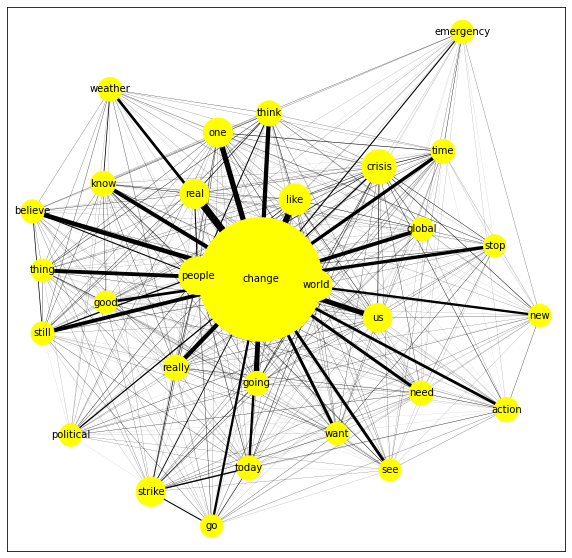

In [12]:
# Your answer here

#Imports
import nltk
from collections import Counter
import networkx as nx
from matplotlib import pyplot as plt

df["words"] = df.tweet.apply(lambda x: nltk.word_tokenize(x))

###################################################################################
# The 'counter' object will have all the word count information. 
# The 'co_counter' object will have all the co-occurrence count information.
###################################################################################

counter = Counter()
co_counter = dict()

for l in df.words:
    word_set = set()
    
    for item in l:
        word = item.lower()
        
        if word not in (global_stopwords + local_stopwords):
            word_set.add(word)

    counter.update(word_set)
    
    ###################################################################################
    # Calculate co-occurrence count of two words and save it in 'co_counter' 
    ###################################################################################

    words = list(word_set)
    for word1 in words:
        if word1 not in co_counter:
            co_counter[word1] = dict()
        
        for word2 in words:

            ######################################
            # Skip if the two words are the same.
            ######################################

            if word1 == word2:
                continue
            
            if word2 not in co_counter[word1]:
                co_counter[word1][word2] = 1
            else:
                co_counter[word1][word2] += 1
                
G = nx.Graph()
num_nodes = 30

nodes = [item[0] for item in counter.most_common(num_nodes)]
node_weights = [item[1] * 5 for item in counter.most_common(num_nodes)]

for word in nodes:
    G.add_node(word, weight=counter.get(word))
    
for word1 in nodes:
    for word2 in nodes:
        if (word1 != word2) & (word2 in co_counter[word1]):
            G.add_edge(word1, word2, weight=co_counter[word1][word2])
            
edges = nx.get_edge_attributes(G, "weight").keys()
edge_weights = nx.get_edge_attributes(G, "weight").values()
edge_weights = [item / 20 for item in edge_weights]

plt.figure(figsize=(10, 10))
nx.draw_networkx(G, pos=nx.spring_layout(G), 
                 nodelist=nodes, node_size=node_weights, edgelist=edges, width=edge_weights,
                 node_color="yellow", with_labels=True, font_size=10)
plt.draw()


### 5. (4 pts)

In [13]:
# Your answer here

#imports
from sklearn.metrics.pairwise import cosine_similarity

df2 = df[:500]
dtm = vectorizer.fit_transform(df2.tweet)

df2_sim = pd.DataFrame(data=cosine_similarity(dtm), columns=df2.index, index=df2.index)
for pos1 in df2_sim.index:
    for pos2 in df2_sim.index:
        if pos1 != pos2:
            tweet1 = df2.tweet[pos1]
            tweet2 = df2.tweet[pos2]
            
            # Skip if the first 20 characters of one tweet are in the other tweet
            if (tweet1[:20] in tweet2) | (tweet2[:20] in tweet1):
                continue
            
            sim = df2_sim[pos2][pos1]
            
            if (sim > 0.7) & (sim < 1):
                print(tweet1)
                print(tweet2)
                print("{:.3f}".format(sim))
                print()

wishing i was at the climate strike ☹️
wishing I could be at the climate strike 🙃
0.817

wishing I could be at the climate strike 🙃
wishing i was at the climate strike ☹️
0.817



### 6. (6 pts)

https://www.who.int/news-room/releases/1

In [14]:
# Your answer here

#imports
from bs4 import BeautifulSoup
import requests

url="https://www.who.int/news-room/releases/{}"
urls=[]
file= "outcome/test2_output.csv"

# urls for 5 pages
for i in range(1, 6): 
    urls.append(url.format(i))

# csv file content update from above url's
with open(file, "w", encoding="utf8") as fw:
    fw.write("title\turl\n") 
    for url in urls:
        r = requests.get(url)
        soup = BeautifulSoup(r.content, "html.parser")
        div_list = soup.find_all("div",{"class": "list-view--item vertical-list-item"})
        for _div in div_list:
            title = _div.find("p").text.strip().replace("\n","").replace("\t","").replace("\r","")
            url = _div.find("a")["href"]
            fw.write("{}\t{}\n".format(title, url))

In [15]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df_who = pd.read_csv("outcome/test2_output.csv", sep="\t")
df_who

,title,url
0,"Carl Bildt, former Prime Minister of Sweden, appointed WHO Special Envoy for the ACT-Accelerator",/news/item/31-03-2021-carl-bildt-former-prime-minister-of-sweden-appointed-who-special-envoy-for-the-act-accelerator
1,"WHO calls for further studies, data on origin of SARS-CoV-2 virus, reiterates that all hypotheses remain open",/news/item/30-03-2021-who-calls-for-further-studies-data-on-origin-of-sars-cov-2-virus-reiterates-that-all-hypotheses-remain-open
2,Global leaders unite in urgent call for international pandemic treaty,/news/item/30-03-2021-global-leaders-unite-in-urgent-call-for-international-pandemic-treaty
3,COVID-19 highlights urgent need to reboot global effort to end tuberculosis,/news/item/22-03-2021-covid-19-highlights-urgent-need-to-reboot-global-effort-to-end-tuberculosis
4,WHO announces 2nd edition Health for All Film Festival shortlist and jury composition,/news/item/22-03-2021-who-announces-2nd-edition-health-for-all-film-festival-shortlist-and-jury-composition
5,Ageism is a global challenge: UN,/news/item/18-03-2021-ageism-is-a-global-challenge-un
6,New research highlights risks of separating newborns from mothers during COVID-19 pandemic,/news/item/16-03-2021-new-research-highlights-risks-of-separating-newborns-from-mothers-during-covid-19-pandemic
7,COVID-19 Solidarity Response Fund marks first anniversary and appeals for continued support,/news/item/15-03-2021-covid-19-solidarity-response-fund-marks-first-anniversary-and-appeals-for-continued-support
8,WHO adds Janssen vaccine to list of safe and effective emergency tools against COVID-19,/news/item/12-03-2021-who-adds-janssen-vaccine-to-list-of-safe-and-effective-emergency-tools-against-covid-19
9,ACT-Accelerator releases prioritised strategy and budget for 2021 to change the course of the evolving COVID-19 pandemic,/news/item/12-03-2021-act-accelerator-releases-prioritised-strategy-and-budget-for-2021-to-change-the-course-of-the-evolving-covid-19-pandemic


In [16]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
len(df_who)     # Expected output: 50

50

## * Make sure to Restart & Run All to create a clean version of this notebook!